In [1]:
from google.colab import files
uploaded = files.upload()

Saving Cab_Data - Copy.csv to Cab_Data - Copy (1).csv
Saving City.csv to City (1).csv
Saving Customer_ID.csv to Customer_ID (1).csv
Saving Transaction_ID.csv to Transaction_ID (1).csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
cab=pd.read_csv("Cab_Data - Copy.csv")
city=pd.read_csv("City.csv")
customer=pd.read_csv("Customer_ID.csv")
transaction=pd.read_csv("Transaction_ID.csv")


In [4]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
1,10000029,1/2/2016,Pink Cab,BOSTON MA,21.34,324.21,226.204
2,10000030,1/2/2016,Pink Cab,BOSTON MA,41.30,646.06,454.300
3,10000041,1/2/2016,Pink Cab,CHICAGO IL,35.02,598.43,406.232
4,10000045,1/2/2016,Pink Cab,CHICAGO IL,3.24,48.04,33.696


In [5]:
city.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
# merging data frames
Data_merged1=pd.merge(transaction, customer, on="Customer ID")

Data_merged1.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [10]:

Data_merged=pd.merge(cab, Data_merged1, on="Transaction ID")
Data_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
1,10000029,1/2/2016,Pink Cab,BOSTON MA,21.34,324.21,226.204,58925,Card,Male,38,26550
2,10000030,1/2/2016,Pink Cab,BOSTON MA,41.30,646.06,454.300,58551,Card,Male,25,21734
3,10000041,1/2/2016,Pink Cab,CHICAGO IL,35.02,598.43,406.232,4289,Card,Male,19,28719
4,10000045,1/2/2016,Pink Cab,CHICAGO IL,3.24,48.04,33.696,5734,Card,Male,23,22475


In [11]:
Data_merged.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [12]:
# list unique values
Data_merged.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [13]:
Data_merged['Date of Travel'] = pd.to_datetime(Data_merged['Date of Travel'])

In [14]:
Data_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.204,58925,Card,Male,38,26550
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.300,58551,Card,Male,25,21734
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.232,4289,Card,Male,19,28719
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.696,5734,Card,Male,23,22475


In [15]:
Data_merged['Profit']=Data_merged['Price Charged']-Data_merged['Cost of Trip']
Data_merged['Profit/KM']=Data_merged['KM Travelled']/Data_merged['Profit']
Data_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit/KM
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568,0.327916
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.204,58925,Card,Male,38,26550,98.006,0.217742
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.300,58551,Card,Male,25,21734,191.760,0.215373
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.232,4289,Card,Male,19,28719,192.198,0.182208
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.696,5734,Card,Male,23,22475,14.344,0.225878


In [16]:
Data_merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit/KM
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,27.5680,0.327916
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,98.0060,0.217742
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,191.7600,0.215373
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,192.1980,0.182208
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.6960,5734,Card,Male,23,22475,14.3440,0.225878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439960,2018-12-31,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,52449,Card,Female,40,23569,63.2384,0.536541
359388,10439984,2018-12-31,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,51614,Card,Female,55,12279,156.9800,0.254810
359389,10440028,2018-12-31,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,52389,Card,Female,29,5568,78.0244,0.336049
359390,10440034,2018-12-31,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,51877,Cash,Male,46,16993,35.1192,0.987494


In [17]:
Data_merged.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit,Profit/KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198,inf
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840,NaN
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000,-1.053000e+04
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000,8.863321e-02
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000,1.864359e-01
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000,3.798302e-01
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000,inf


In [18]:
# filtering unique customers ...... For counting number of total customer per company 
unique_data=Data_merged.drop_duplicates(subset='Customer ID')
unique_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit/KM
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,27.5680,0.327916
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,98.0060,0.217742
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,191.7600,0.215373
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,192.1980,0.182208
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.6960,5734,Card,Male,23,22475,14.3440,0.225878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359271,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,45644,Card,Male,28,23014,-2.8388,-9.560378
359375,10439393,2018-12-31,Yellow Cab,ORANGE COUNTY,24.78,379.42,347.9112,15270,Cash,Female,18,19636,31.5088,0.786447
359377,10439410,2018-12-31,Yellow Cab,PITTSBURGH PA,4.04,81.05,52.8432,50921,Card,Male,33,18698,28.2068,0.143228
359378,10439419,2018-12-31,Yellow Cab,SACRAMENTO CA,32.67,469.42,466.5276,46512,Cash,Male,20,16996,2.8924,11.295118


In [43]:
customers_final= unique_data.groupby(["Company"]).size().reset_index(name="Number of Customers")
customers_final.head(20)

,Company,Number of Customers
0,Pink Cab,14716
1,Yellow Cab,31432


In [20]:
customers_city= unique_data.groupby(["Company", "City"]).size().reset_index(name="Number of Customers")
customers_city.head(20)

,Company,City,Number of Customers
0,Pink Cab,ATLANTA GA,619
1,Pink Cab,AUSTIN TX,921
2,Pink Cab,BOSTON MA,444
3,Pink Cab,CHICAGO IL,437
4,Pink Cab,DALLAS TX,552
5,Pink Cab,DENVER CO,784
6,Pink Cab,LOS ANGELES CA,1139
7,Pink Cab,MIAMI FL,875
8,Pink Cab,NASHVILLE TN,1129
9,Pink Cab,NEW YORK NY,259


In [21]:
# calculating yearly profit 

yearly=Data_merged.groupby(['Company'])
yearly_data = yearly.resample('Y', on='Date of Travel').sum()


In [22]:
yearly_data.reset_index(inplace=True)

In [23]:
yearly_data['Profit/KM']=yearly_data['KM Travelled']/yearly_data['Profit']

In [24]:
yearly_data.head()

,Company,Date of Travel,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit,Profit/KM
0,Pink Cab,2016-12-31,252535636696,563509.67,7908479.23,6.194968e+06,463403433,888288,379315979,1.713511e+06,0.328863
1,Pink Cab,2017-12-31,309686779295,685823.52,9578629.54,7.544975e+06,557353174,1068211,456597545,2.033655e+06,0.337237
2,Pink Cab,2018-12-31,303857614588,661739.92,8841142.56,7.280980e+06,539838701,1035698,439753418,1.560162e+06,0.424148
3,Yellow Cab,2016-12-31,827819816122,1859978.21,38481133.18,2.455414e+07,1610040758,2906889,1236415247,1.392700e+07,0.133552
4,Yellow Cab,2017-12-31,1002496699291,2214879.02,45818910.04,2.924293e+07,1896676773,3469250,1479620741,1.657598e+07,0.133620


In [25]:
# monthly profit

monthly=Data_merged.groupby(['Company'])
monthly_data = monthly.resample('M', on='Date of Travel').sum()
monthly_data.reset_index(inplace=True)


In [26]:
monthly_data.head()

,Company,Date of Travel,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit,Profit/KM
0,Pink Cab,2016-01-31,9272171231,21018.83,305236.77,231283.907,18750545,32932,13969034,73952.863,191.137647
1,Pink Cab,2016-02-29,10509444482,23419.84,344521.86,257046.316,21567399,37600,16122853,87475.544,1506.066540
2,Pink Cab,2016-03-31,12330432872,27893.78,394890.37,307089.187,24388224,42890,18755211,87801.183,39.051419
3,Pink Cab,2016-04-30,12430759350,27357.38,383077.51,300485.657,25684634,44092,18698766,82591.853,780.147652
4,Pink Cab,2016-05-31,15722648860,35137.83,447231.76,385680.802,29974449,54936,23825602,61550.958,4586.505891


In [27]:
# just a test to see if the code work for counting no. of rides 
Data_merged.groupby(['Company']).count()
 # that should be added to df that has summary of both cab 

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit/KM
Company,,,,,,,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681


In [28]:
total_profit= Data_merged.groupby(['Company']).sum()

total_profit.head()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit,Profit/KM
Company,,,,,,,,,
Pink Cab,866080030579,1911073.11,2.632825e+07,2.102092e+07,1560595308,2992197,1275666942,5.307328e+06,inf
Yellow Cab,2807179773351,6199417.47,1.258539e+08,8.183351e+07,5336730929,9707532,4132759631,4.402037e+07,inf


In [29]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
total_profit['total_rides']=Data_merged.groupby(['Company']).count()['Transaction ID']
total_profit.head()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit,Profit/KM,total_rides
Company,,,,,,,,,,
Pink Cab,866080030579,1911073.11000,26328251.33000,21020923.00900,1560595308,2992197,1275666942,5307328.32100,inf,84711
Yellow Cab,2807179773351,6199417.47000,125853887.19000,81833514.01920,5336730929,9707532,4132759631,44020373.17080,inf,274681


In [30]:
# drop columns 
# add profit per ride
total_profit= total_profit.drop(['Transaction ID','Income (USD/Month)','Customer ID','Age'],axis=1)
total_profit['Profit/Ride']=(total_profit['Profit'])/total_profit['total_rides']
total_profit['Profit/KM']=(total_profit['Profit'])/total_profit['KM Travelled']
total_profit.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Profit/KM,total_rides,Profit/Ride
Company,,,,,,,
Pink Cab,1911073.11000,26328251.33000,21020923.00900,5307328.32100,2.77715,84711,62.65217
Yellow Cab,6199417.47000,125853887.19000,81833514.01920,44020373.17080,7.10073,274681,160.25999


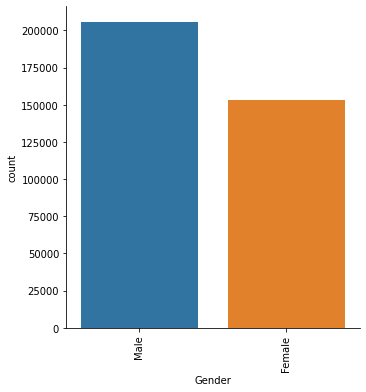

In [31]:
# count plot of gender
fig1 = sns.catplot(x='Gender', kind="count", data=Data_merged)
fig1.set_xticklabels(rotation=90)
plt.show()


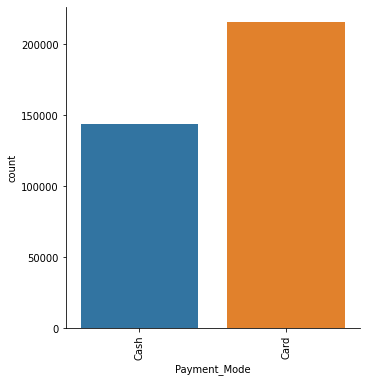

In [32]:
# count plot of payment mode

fig2 = sns.catplot(x='Payment_Mode', kind="count", data=Data_merged)
fig2.set_xticklabels(rotation=90)
plt.show()

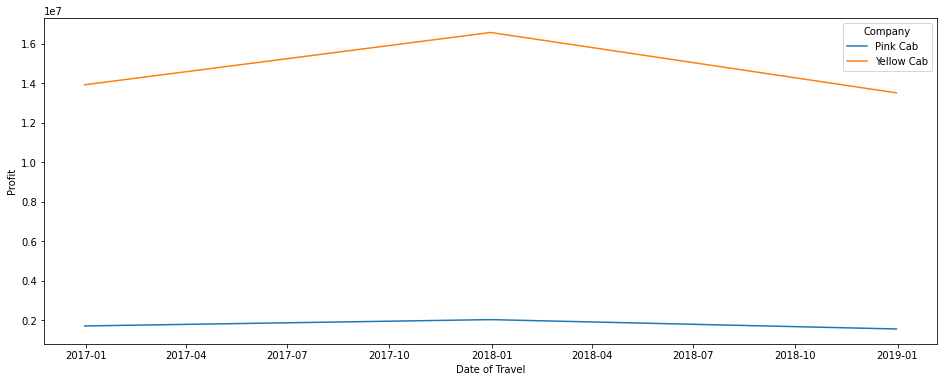

In [33]:
plt.figure(figsize=(16, 6))
fig3 = sns.lineplot(x='Date of Travel', y="Profit",hue=yearly_data['Company'],data=yearly_data)
#fig3.set(xscale="log")
#fig3.set_xticklabels(fig3.get_xticklabels(),rotation=45)
plt.show()


In [34]:
# Scatter plot of monthly profit
Pink_Cab= monthly_data[monthly_data ['Company']=='Pink Cab'] 
Yellow_Cab= monthly_data[monthly_data ['Company']=='Yellow Cab'] 


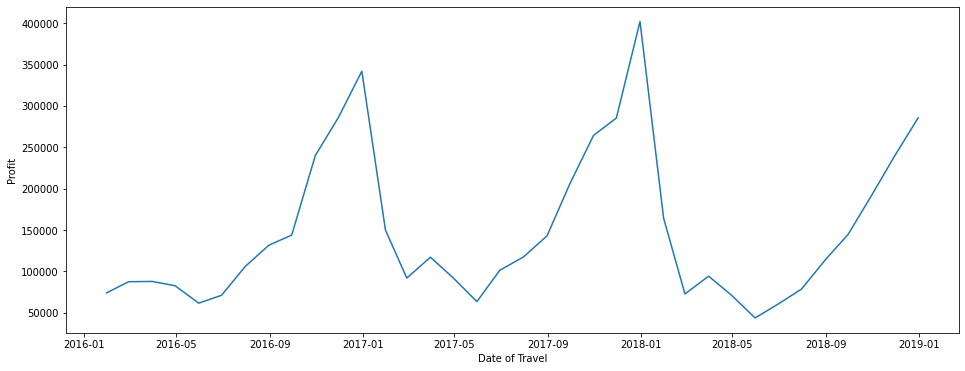

In [35]:
plt.figure(figsize=(16, 6))
fig4 = sns.lineplot(x='Date of Travel', y="Profit",data=Pink_Cab)
plt.show()


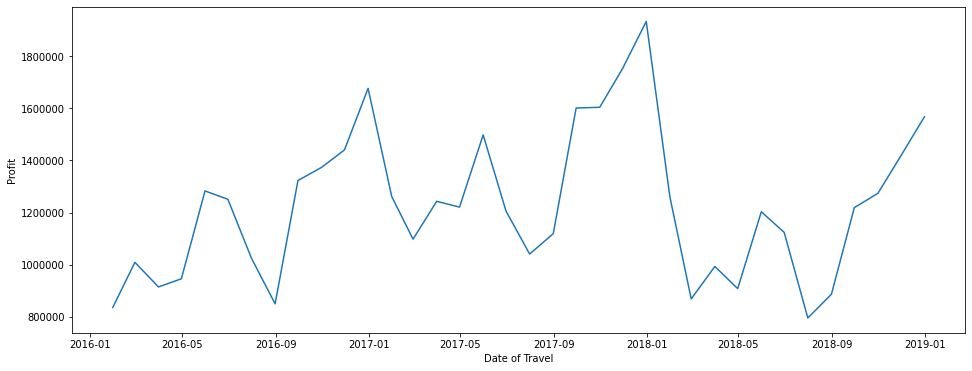

In [36]:
plt.figure(figsize=(16, 6))
fig5 = sns.lineplot(x='Date of Travel', y="Profit",data=Yellow_Cab)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


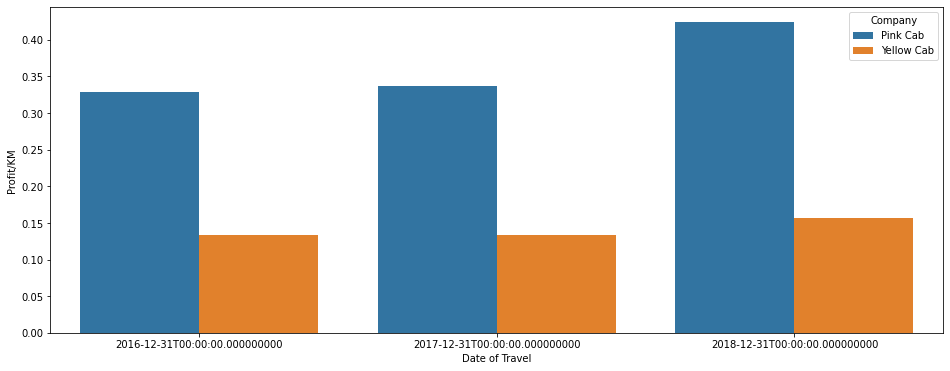

In [37]:
# plot profit/km
plt.figure(figsize=(16, 6))
fig6 = sns.barplot(x='Date of Travel', y='Profit/KM',hue='Company', data=yearly_data)
plt.show()

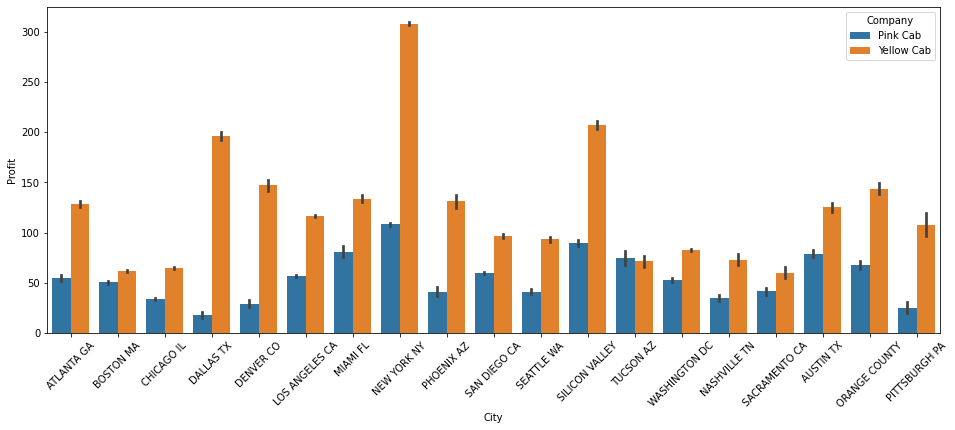

In [38]:
# plot profit/km
plt.figure(figsize=(16, 6))
fig7 = sns.barplot(x='City', y='Profit',hue='Company', data=Data_merged)
fig7.set_xticklabels(fig7.get_xticklabels(),rotation=45)
plt.show()

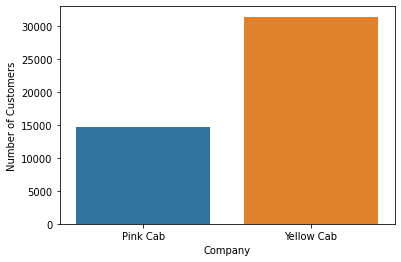

In [44]:

# plot customers / company 
fig8 = sns.barplot(x='Company', y='Number of Customers', data=customers_final)
plt.show()


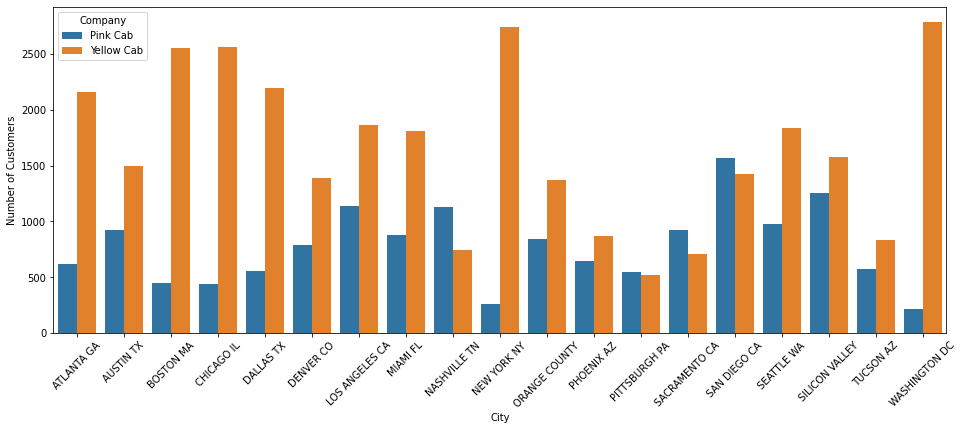

In [45]:
customers_city
# plot customers / company per company 
plt.figure(figsize=(16, 6))
fig8 = sns.barplot(x='City', y='Number of Customers',hue='Company', data=customers_city)
fig8.set_xticklabels(fig8.get_xticklabels(),rotation=45)
plt.show()

# Final Recomendation: 

- yellow cab has more reach and more customers compared to pink cab
- yellow cab profits was more than pink cab from 2016 to 2018 
 
Thus I recommend investing with yellow cab as it will be a better option with more potential for gains